In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2012/results.csv", header=0, error_bad_lines=False)

clmns = ['age', 'net']
df_std = stats.zscore(df[clmns]) 

    
    
    

In [3]:


for col in df.columns: 
    print(col)

division
name
city
gender
age
official
bib
overall
state
genderdiv
net
country


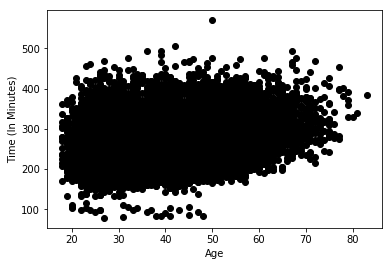

In [4]:
X = df[["age","net"]]
#Visualise data points
plt.scatter(X["age"],X["net"],c='black')
plt.xlabel('Age')
plt.ylabel('Time (In Minutes)')
plt.show()

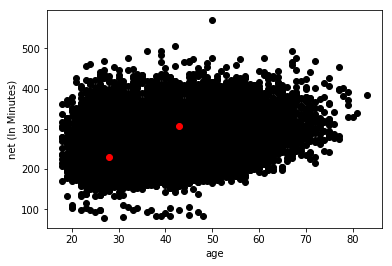

In [5]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=2

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["age"],X["net"],c='black')
plt.scatter(Centroids["age"],Centroids["net"],c='red')
plt.xlabel('age')
plt.ylabel('net (In Minutes)')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_std)
labels = kmeans.labels_


In [11]:
df['clusters'] = labels
clmns.extend(['clusters'])



Text(27.468689236111118, 0.5, 'net')

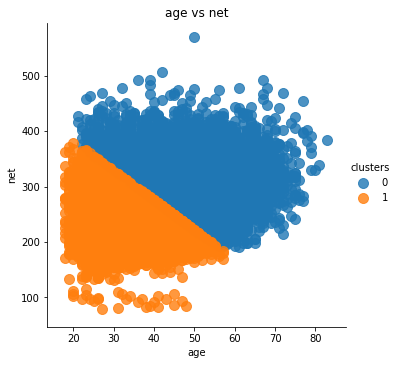

In [13]:
#Scatter plot of age and net
sns.lmplot('age', 'net', 
           data=df, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('age vs net')
plt.xlabel('age')
plt.ylabel('net')